# IGTI - Bootcamp Analista de Machine Learning

    Autor: Leonardo Simões

## Desafio Módulo 1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
df = pd.read_csv('comp_bikes_mod.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [4]:
df.isna().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


    1) No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente? 

In [6]:
df.shape

(17379, 17)

    2) Quantos tipos diferentes de dados existem no dataset do desafio? 

In [7]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [8]:
df.dtypes.nunique()

2

    3) Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)? 

In [9]:
df['temp'].isna().sum()

1738

In [10]:
df['temp'].shape[0]

17379

In [11]:
df['temp'].isna().sum()/df['temp'].shape[0]

0.10000575407100523

    4) Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente? 

In [12]:
df['dteday'].isna().sum()

1738

In [13]:
df2 = df.dropna(subset=['dteday'])
df2.shape

(15641, 17)

    5) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)? 

In [14]:
df2['temp'].mean()

0.4969259206597582

    6) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)? 

In [15]:
df2['windspeed'].std()

0.12230930508286268

    7) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Transforme a coluna "season" em valores categóricos. 
    Quantas categorias diferentes existem? 

In [16]:
df2['season'].unique()

array([ 1., nan,  2.,  3.,  4.])

In [17]:
df2['season'].nunique()

4

In [18]:
df2['season'].astype('category').unique()

[1.0, NaN, 2.0, 3.0, 4.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [19]:
pd.get_dummies(df2['season']).columns

Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64')

In [20]:
#Transformando a coluna "season" em valores categóricos
df2['season'] = df2['season'].astype('category')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    8) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Transforme a coluna "dteday" no tipo "datetime". 
    Qual é a última data presente no dataset (YYYY-MM-DD)? 

In [21]:
#Transformando a coluna "dteday" no tipo "datetime"
df2['dteday'] = pd.to_datetime(df2['dteday'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df2['dteday'].tail(1)

17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

    9) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?
    
    ( )Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
    ( )Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
    (X)Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
    ( )Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

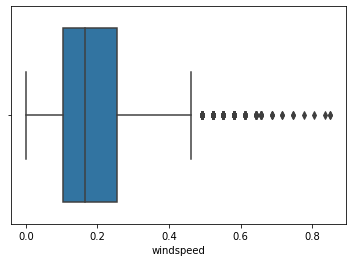

In [23]:
sbn.boxplot(df2['windspeed'])

    10) Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
    Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". 
    Plot a matriz de correlação. 
    Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:
    
    ( )Possuem alta correlação linear positiva.
    (X)Possuem baixa correlação linear negativa.
    ( )Possuem baixa correlação linear positiva.
    ( )Possuem alta correlação linear negativa.

In [24]:
df2[["season", "temp", "atemp", "hum", "windspeed"]].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.988102,-0.069887,-0.016022
atemp,0.988102,1.000000,-0.054224,-0.058803
hum,-0.069887,-0.054224,1.000000,-0.289859
windspeed,-0.016022,-0.058803,-0.289859,1.000000


In [25]:
df2[["cnt", "hum"]].corr()

,cnt,hum
cnt,1.000000,-0.323409
hum,-0.323409,1.000000


    11) Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. 
    Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. 
    Aplique uma regressão linear. 
    Qual o valor de R2? Utilize as entradas como teste. 

In [26]:
df2[['hum', 'cnt', 'casual']].isna().sum()

hum       1571
cnt       1562
casual    1570
dtype: int64

In [27]:
df2['hum'].fillna(df2['hum'].mean(), inplace = True)
df2['cnt'].fillna(df2['cnt'].mean(), inplace = True)
df2['casual'].fillna(df2['casual'].mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
df2[['hum', 'cnt', 'casual']].isna().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [29]:
X, y = df2[['hum', 'casual']], df2['cnt']

In [44]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X,y)

0.40598592511221737

    12) Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" 
    como variavel dependente). 
    Aplique a árvore de decisão como regressão. 
    Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default". 

In [43]:
regr2 = DecisionTreeRegressor(random_state=0)
regr2 = regr2.fit(X, y)
regr2.score(X,y)

0.7098339715834964

    13)  Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

    (X)O valor obtido pela árvore de decisão como regressor apresenta maior R2
    ( )O valor encontrado pela árvore de decisão foi negativo.
    ( )O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.
    ( )Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.

    14)  Comparando o SVM com a árvore de decisão é CORRETO afirmar:

    ( )Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.
    ( )Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.
    ( )SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
    (X)SVM encontra o hiperplano que gera a maior separação entre os dados.


    15)  Com base na árvore de decisão é CORRETO afirmar:
    (X)Pode ser utilizada para classificação e regressão.
    ( )Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação 
    realizada através da árvore de decisão.
    ( )Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.
    ( )A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.
